## Test Batch Normalization on tissues


**Question:** How do different batch normalization algorithms perform on adjacent section tissues stained with the same panel?

**Samples:** 
- TMA: Purchased from biomax: https://www.biomax.us/tissue-arrays/Breast/BR1506
- Adjacent Sections: BM-Her2N75-15, BM-Her2N75-17, BM-Her2N75-18 (section 16 skipped.)
- Scenes: (i.e. TMA cores) 
  - 17: ER+/HER2+, immune rich. 
  - 49: ER+/HER2+
  - 59: HER2+ immune rich

**Method**: We performed standard scaling, RESTORE, regress_out or combat normalization on three replicates of 1800 cells sampled from the data (600 cells per core). We calculated the kBET rejection rate, which is 1 for no mixing of batches, and 0 for perfect mixing. 

In [1]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import copy
import seaborn as sns
import importlib
import scanpy as sc
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, minmax_scale
from sklearn.metrics import silhouette_score
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

In [2]:
os.chdir('/home/groups/graylab_share/OMERO.rdsStore/engje/Data/cmIF')
from mplex_image import visualize as viz, process, preprocess
np.random.seed(1211)

# Table of contents <a name="contents"></a>
0. [Load Raw Data](#loadold)
1. [Load Filtered Data](#load)
2. [Functions](#func)
3. [Data Transformation](#run)
4. [Scaling](#scale)
5. [kBET Results](#kbet)
6. [Visualize Normalization](#normviz)
7. [Apply Batch Correction](#viznorm)
8. [Cluster](#cluster)


In [4]:
#load cmif libraries
rootdir = os.getcwd()
#rootdir = '/home/groups/graylab_share/OMERO.rdsStore/engje/Data/20201105_SMT101'
#os.chdir(rootdir)
#os.listdir()

In [5]:
s_date = '20201211'
if not os.path.exists(s_date):
    os.mkdir(s_date)
#datadir = f'{rootdir}/validation_data'
filterdir = f'{rootdir}/filtered_data'
os.chdir(datadir)

## kBET Results <a name="kbet"></a>

[contents](#contents)

In [29]:
os.chdir(filterdir)
df_file = pd.DataFrame(index=os.listdir())
df_file = df_file[df_file.index.str.contains('BM-Her2N75-15-17-18_kbet_')]

In [30]:
#add mean kbet
for s_file in df_file.index:
    df = pd.read_csv(s_file,index_col=0)
    df_file.loc[s_file,'mean_kbet'] = df.loc['mean','kBET.observed']
df_file['norm'] = [item.split('kbet_')[1].split('.csv')[0] for item in df_file.index]

In [33]:
ls_index= df_file.groupby('norm').mean_kbet.mean().sort_values().index
df_file.groupby('norm').mean_kbet.mean().sort_values()

norm
raw_combat                 0.454364
raw_restore_combat         0.520840
raw_regress_out            0.788704
raw_restore_regress_out    0.912364
raw                        0.939605
raw_restore                0.950846
Name: mean_kbet, dtype: float64

In [43]:
df_file['Norm'] = pd.Categorical(
    df_file['norm'], 
    categories=ls_index.tolist(), 
    ordered=True
)

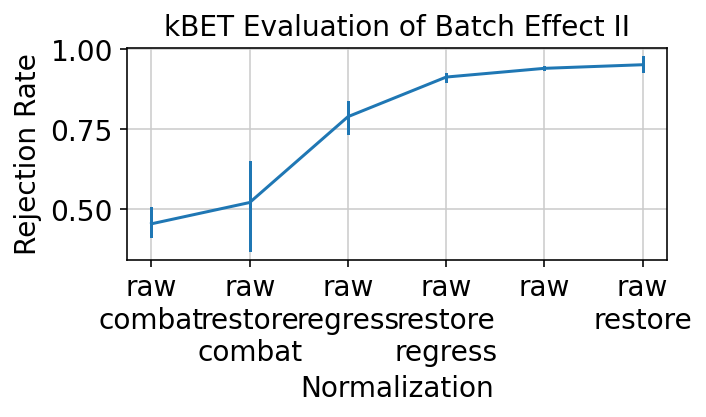

In [52]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(5,3))
sns.lineplot(data=df_file.sort_values('Norm'),x='norm',y='mean_kbet',ax=ax,err_style='bars')
labels = [item.replace('_out','').replace('_','\n') for item in ls_index.tolist()]
ax.set_xticks(range(len(df_file.groupby('norm').mean_kbet)))
ax.set_xticklabels(labels,rotation=0)
ax.set_ylabel('Rejection Rate')
ax.set_xlabel('Normalization')
ax.set_title('kBET Evaluation of Batch Effect II')
fig.set_tight_layout(True)
plt.tight_layout
fig.savefig(f'{rootdir}/{s_date}/BatchEffect.png',dpi=200)

# Test Batch Correction <a name="viznorm"></a>

Apply combat and regress out algorithims

[contents](#contents)

In [19]:
ls_index = [
 #'20201207_BM-Her2N75-15-17-18_SampledMeanIntensity_raw_restore.csv',
 #'20201207_BM-Her2N75-15-17-18_SampledMeanIntensity_raw.csv',
 '20201208_BM-Her2N75-15-17-18_SampledMeanIntensity_raw_restore.csv',
 '20201208_BM-Her2N75-15-17-18_SampledMeanIntensity_raw.csv',
 '20201209_BM-Her2N75-15-17-18_SampledMeanIntensity_raw_restore.csv',
 '20201209_BM-Her2N75-15-17-18_SampledMeanIntensity_raw.csv',
]


... storing 'batch' as categorical
... storing 'scene' as categorical


20201208_BM-Her2N75-15-17-18_SampledMeanIntensity_raw_restore.csv
BM-Her2N75-15_scene017_cell03360
combat


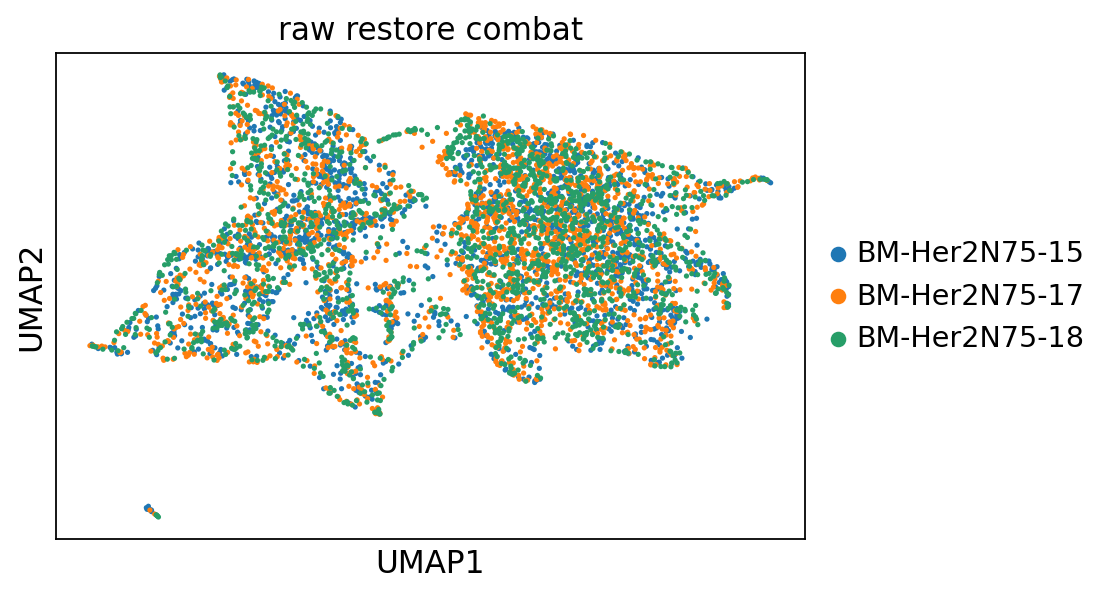

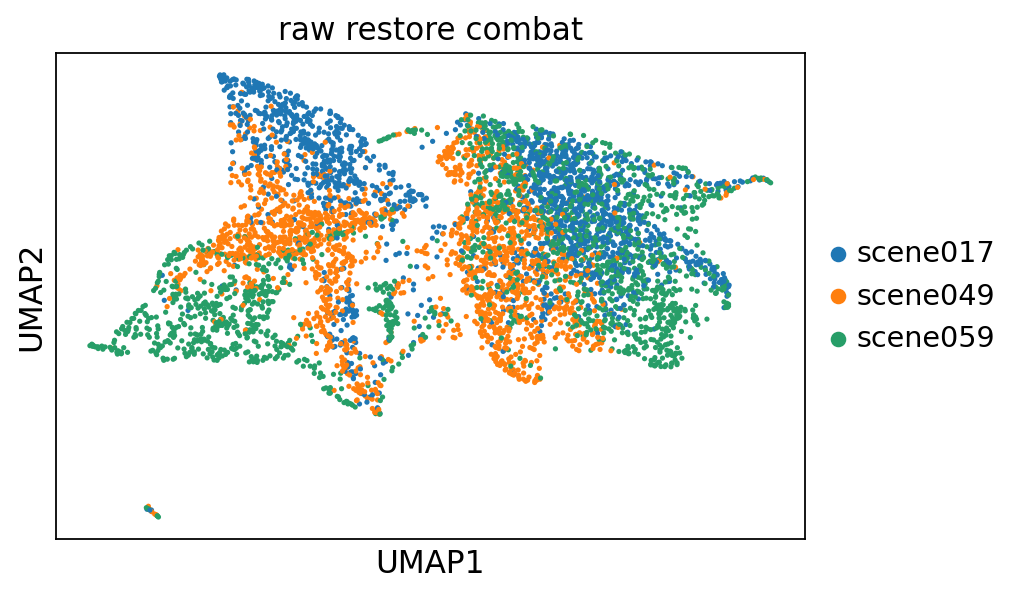

... storing 'batch' as categorical
... storing 'scene' as categorical


20201208_BM-Her2N75-15-17-18_SampledMeanIntensity_raw_restore.csv
BM-Her2N75-15_scene017_cell03360
regress_out


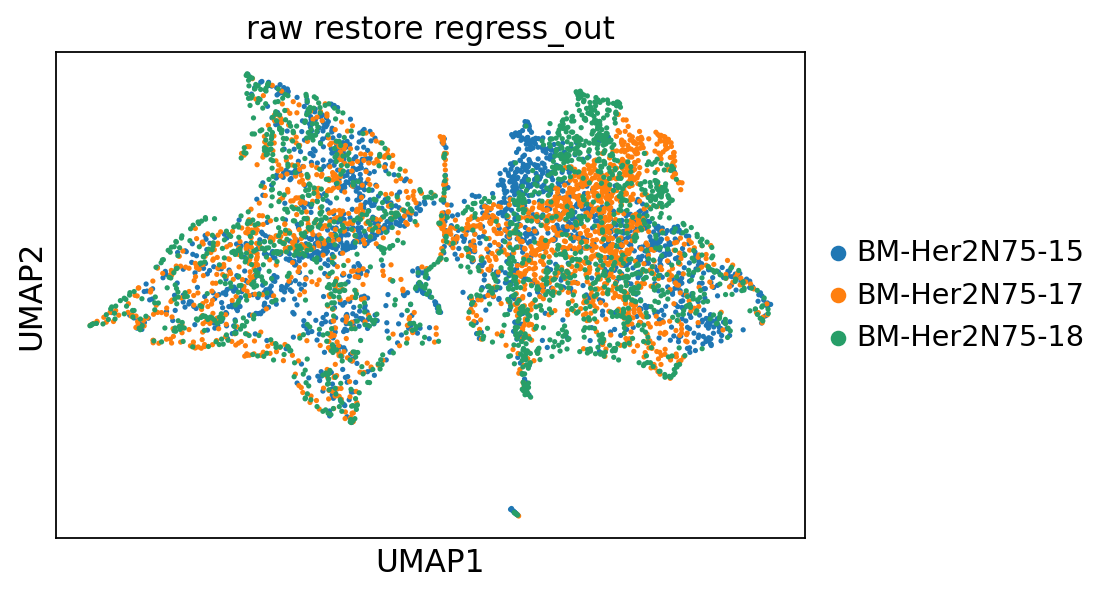

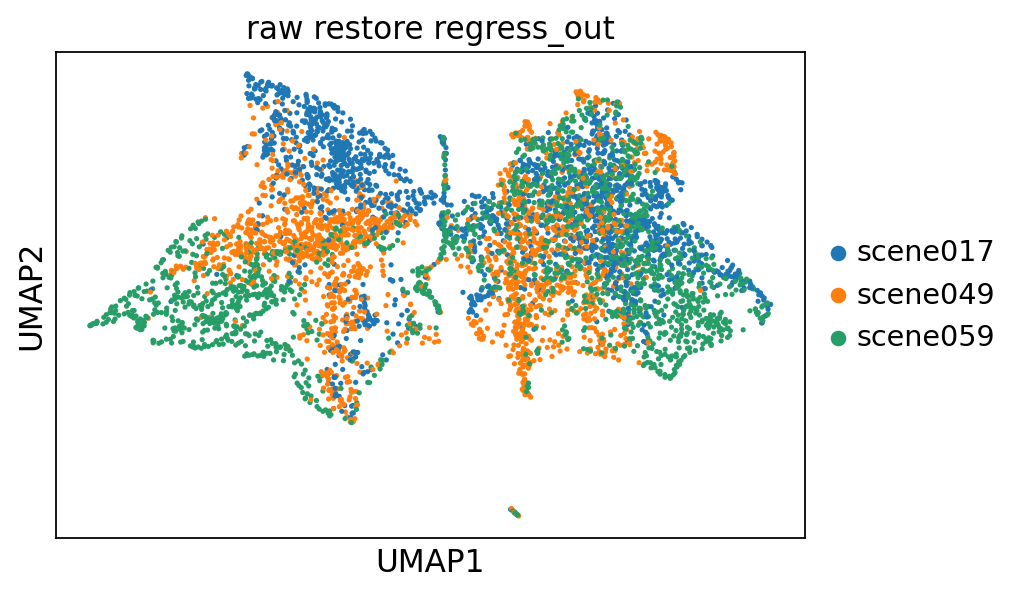

20201208_BM-Her2N75-15-17-18_SampledMeanIntensity_raw_restore.csv
BM-Her2N75-15_scene017_cell03360




... storing 'batch' as categorical
... storing 'scene' as categorical


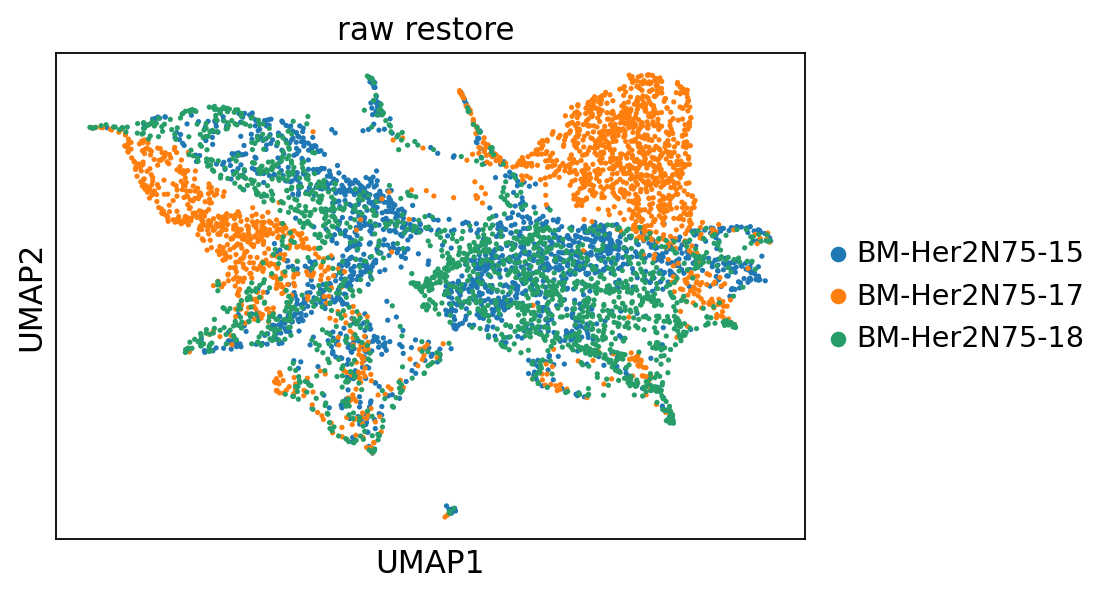

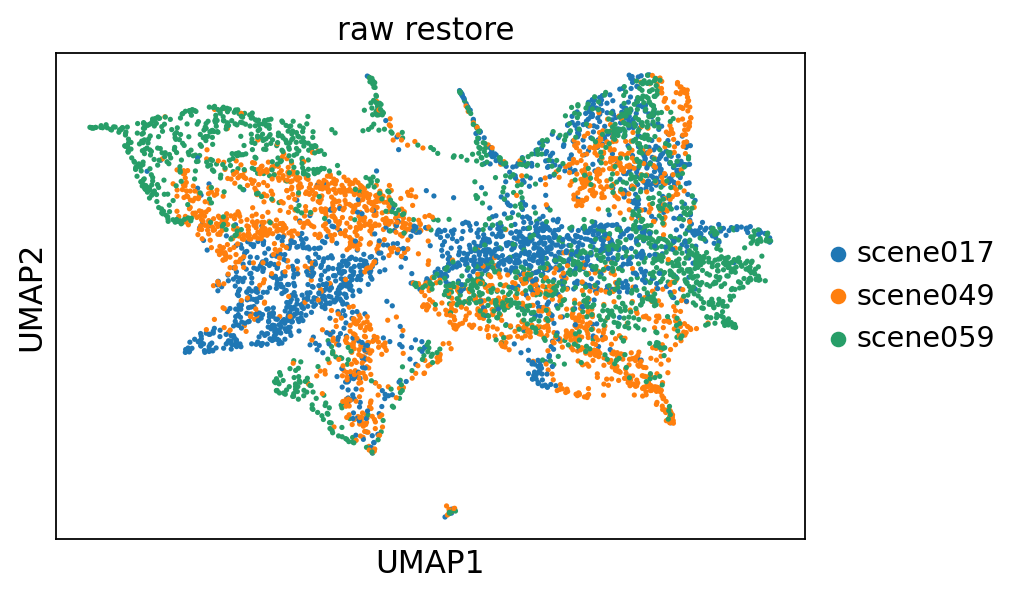

... storing 'batch' as categorical
... storing 'scene' as categorical


20201208_BM-Her2N75-15-17-18_SampledMeanIntensity_raw.csv
BM-Her2N75-15_scene017_cell03360
combat


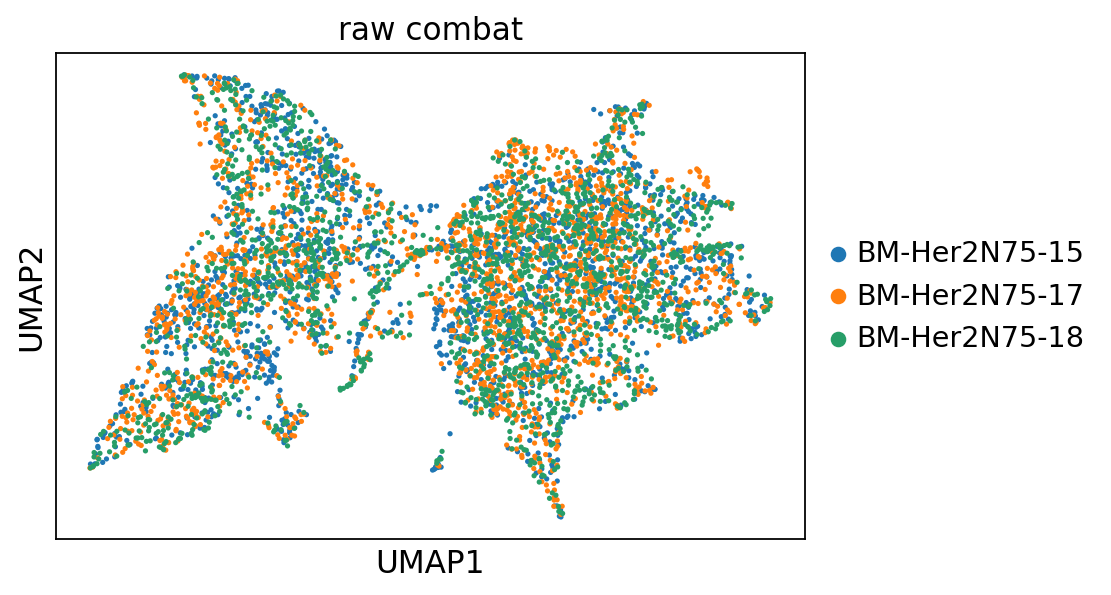

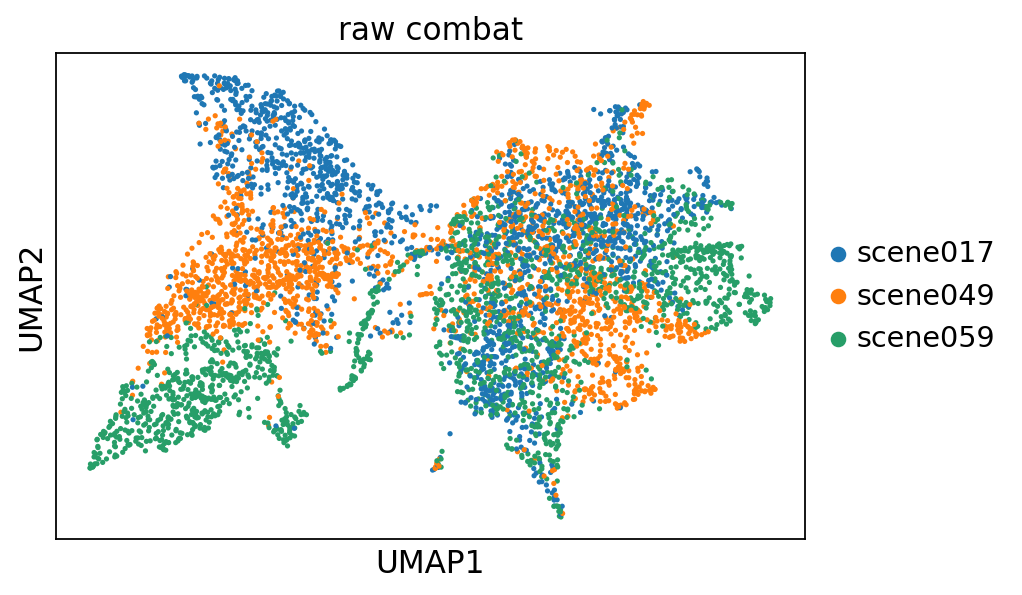

... storing 'batch' as categorical
... storing 'scene' as categorical


20201208_BM-Her2N75-15-17-18_SampledMeanIntensity_raw.csv
BM-Her2N75-15_scene017_cell03360
regress_out


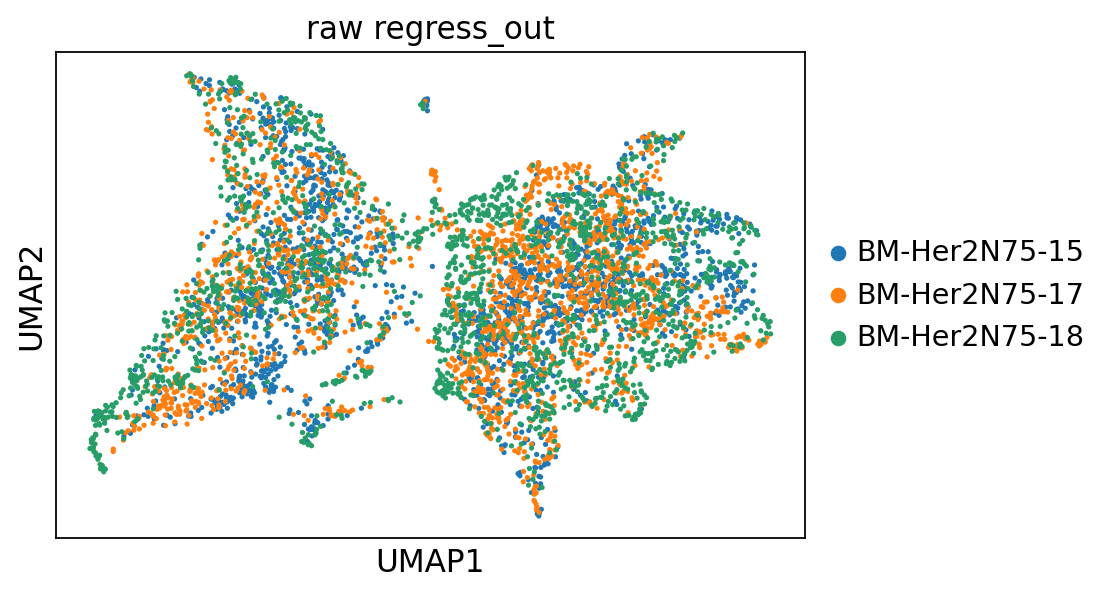

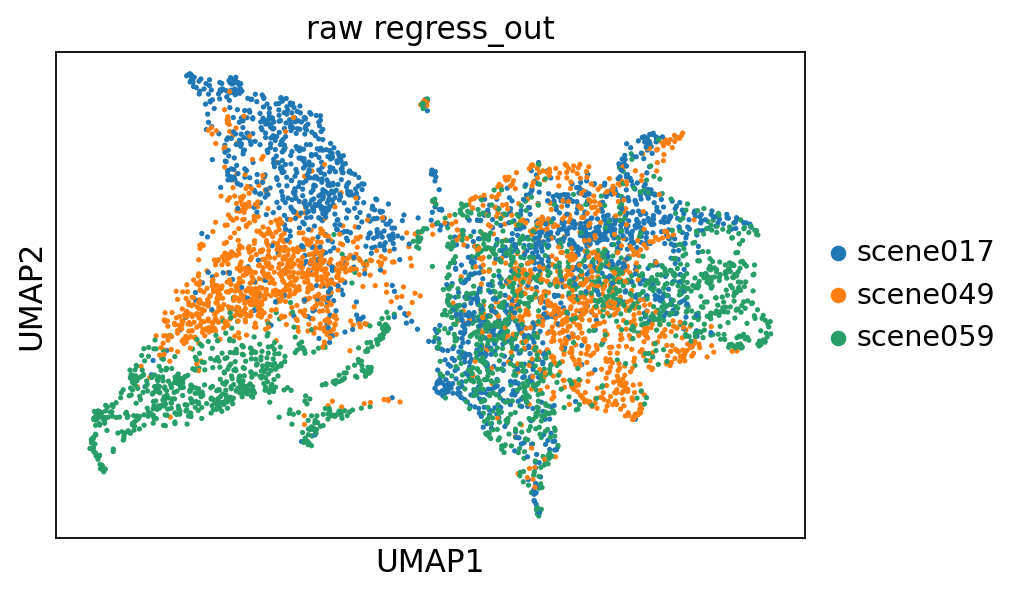

20201208_BM-Her2N75-15-17-18_SampledMeanIntensity_raw.csv
BM-Her2N75-15_scene017_cell03360




... storing 'batch' as categorical
... storing 'scene' as categorical


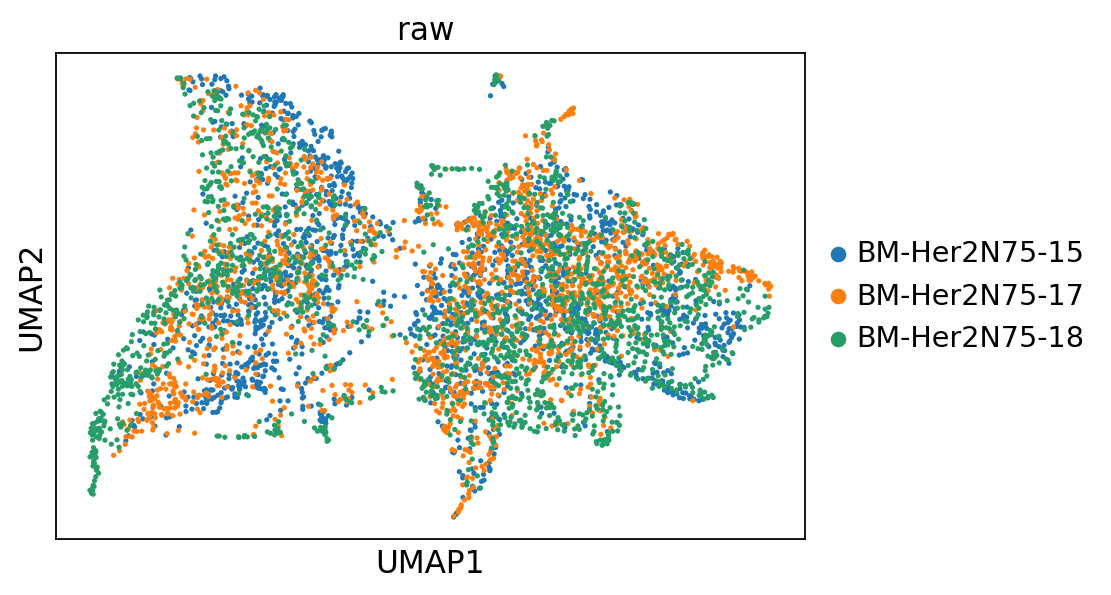

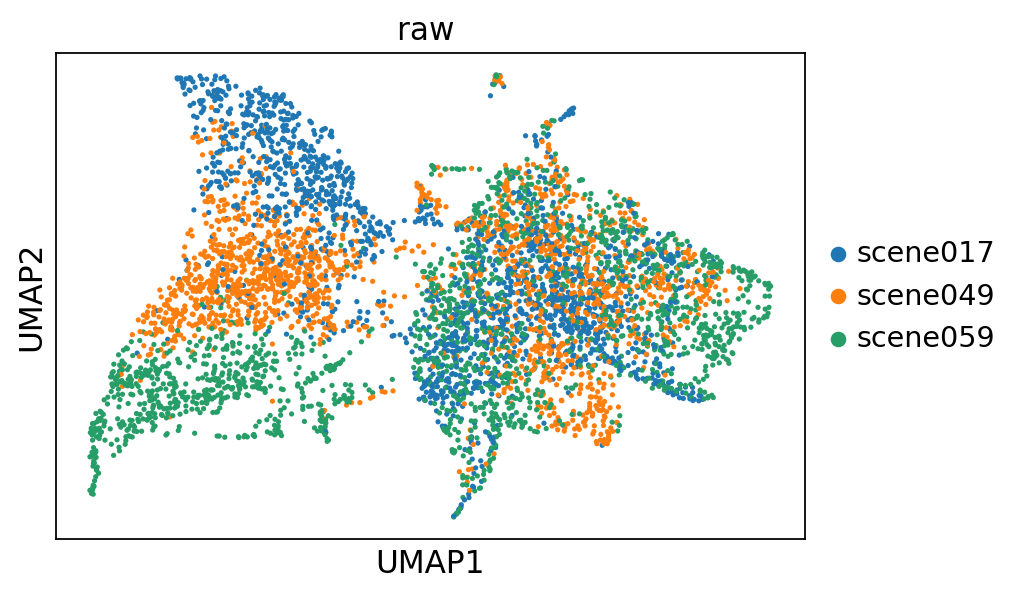

... storing 'batch' as categorical
... storing 'scene' as categorical


20201209_BM-Her2N75-15-17-18_SampledMeanIntensity_raw_restore.csv
BM-Her2N75-15_scene017_cell04093
combat


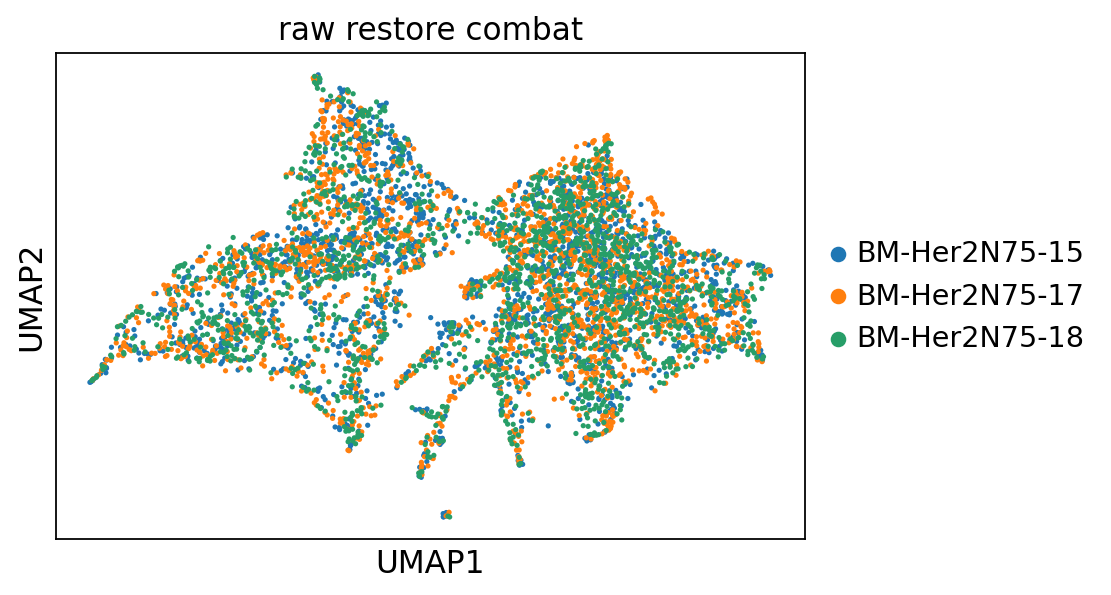

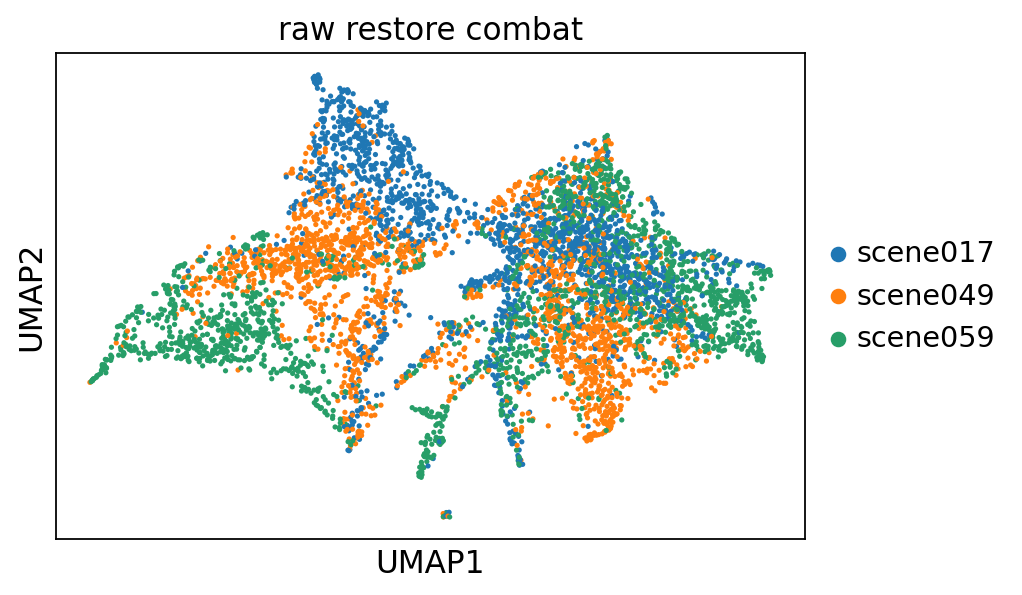

... storing 'batch' as categorical
... storing 'scene' as categorical


20201209_BM-Her2N75-15-17-18_SampledMeanIntensity_raw_restore.csv
BM-Her2N75-15_scene017_cell04093
regress_out


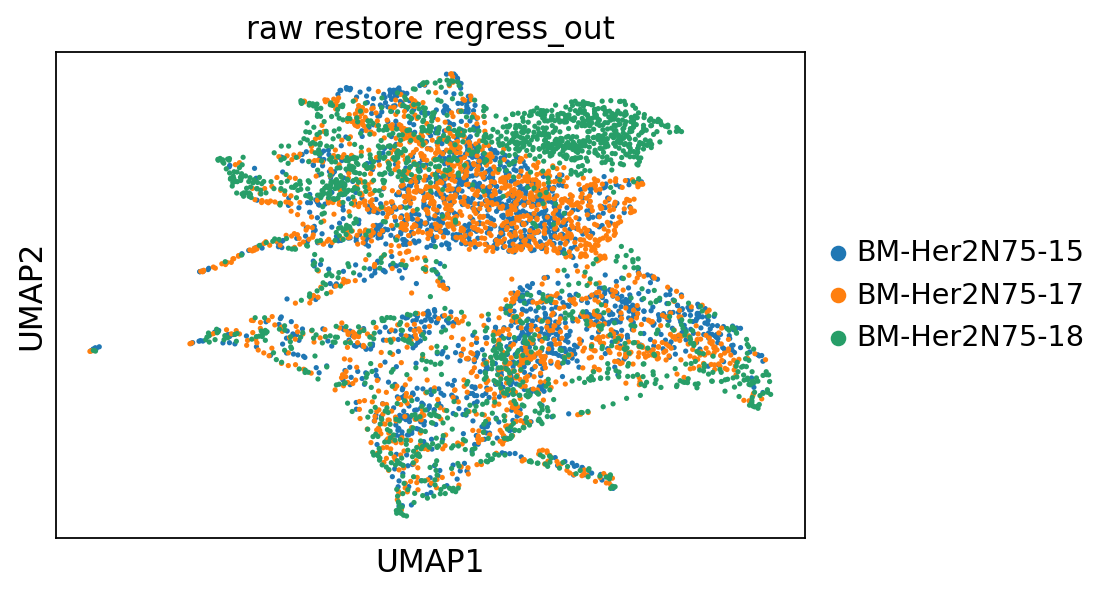

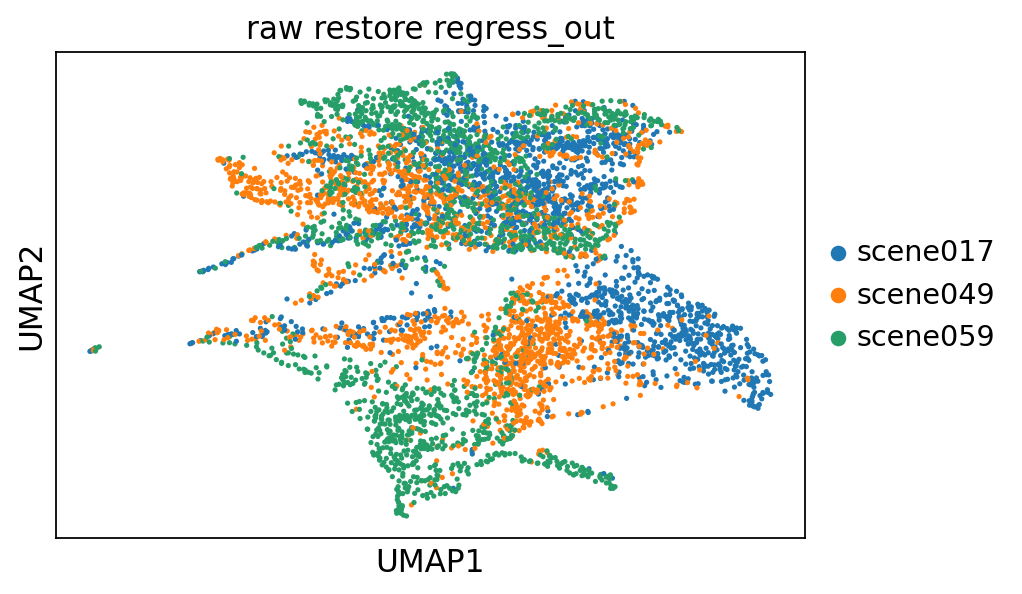

20201209_BM-Her2N75-15-17-18_SampledMeanIntensity_raw_restore.csv
BM-Her2N75-15_scene017_cell04093




... storing 'batch' as categorical
... storing 'scene' as categorical


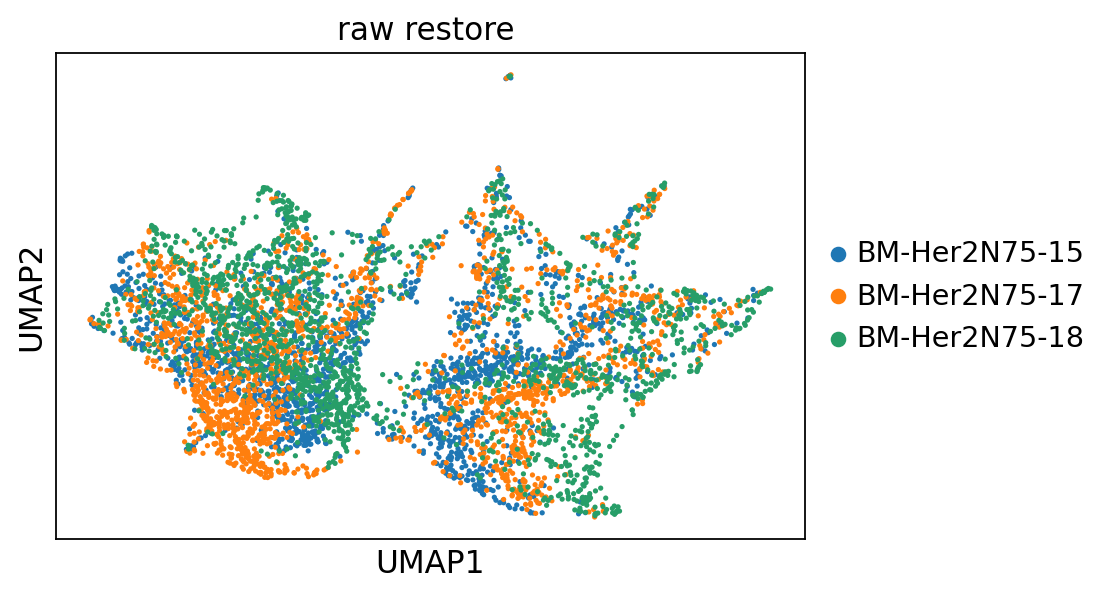

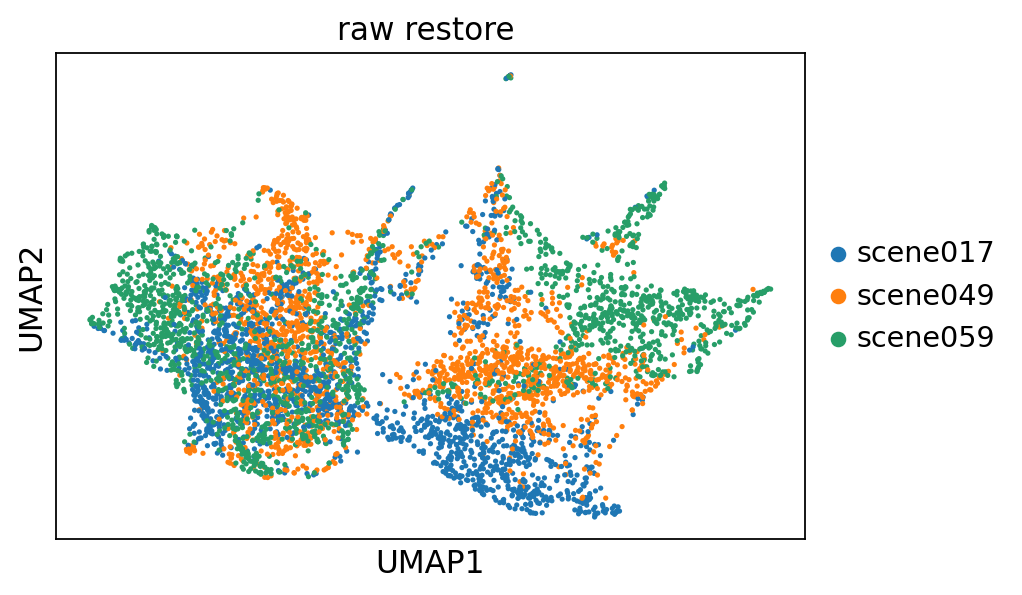

... storing 'batch' as categorical
... storing 'scene' as categorical


20201209_BM-Her2N75-15-17-18_SampledMeanIntensity_raw.csv
BM-Her2N75-15_scene017_cell04093
combat


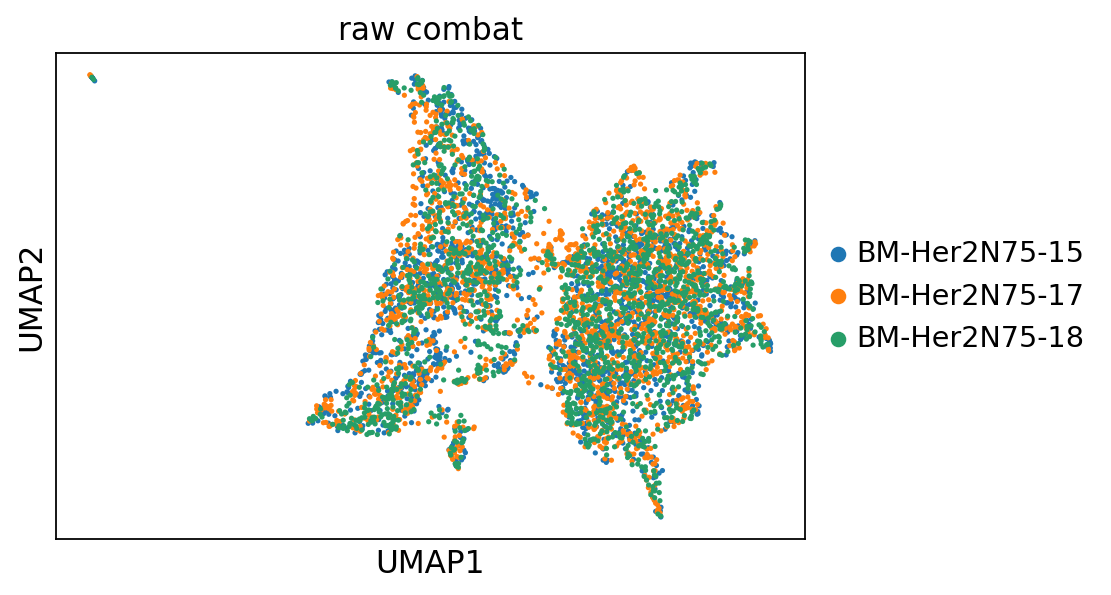

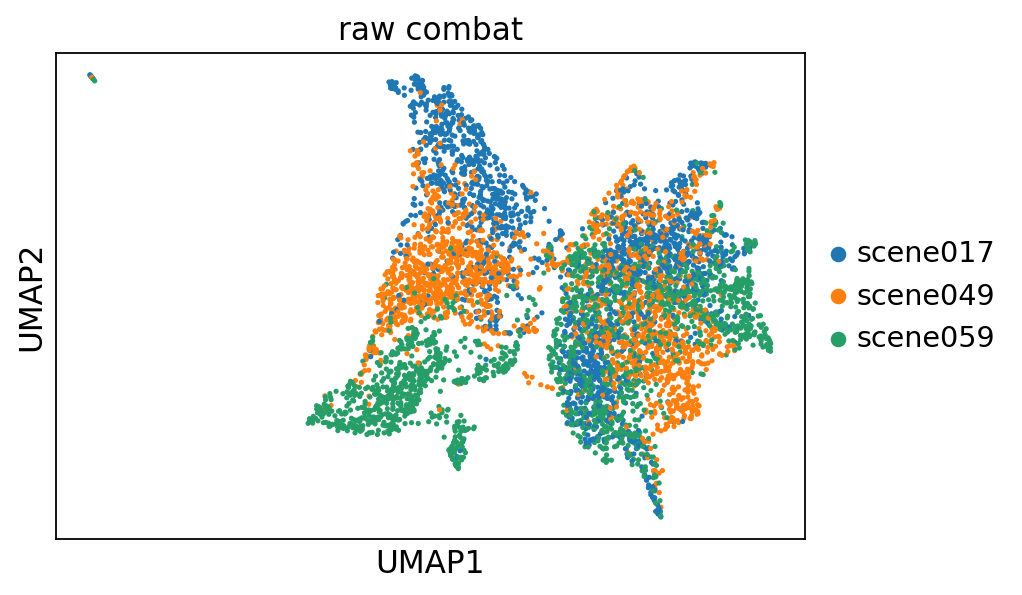

... storing 'batch' as categorical
... storing 'scene' as categorical


20201209_BM-Her2N75-15-17-18_SampledMeanIntensity_raw.csv
BM-Her2N75-15_scene017_cell04093
regress_out


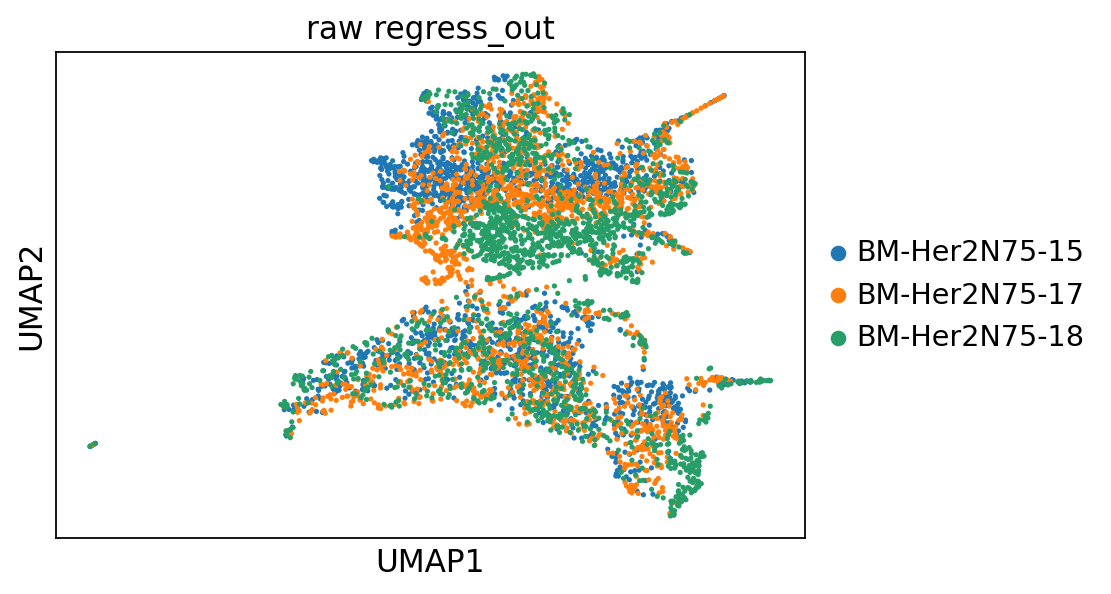

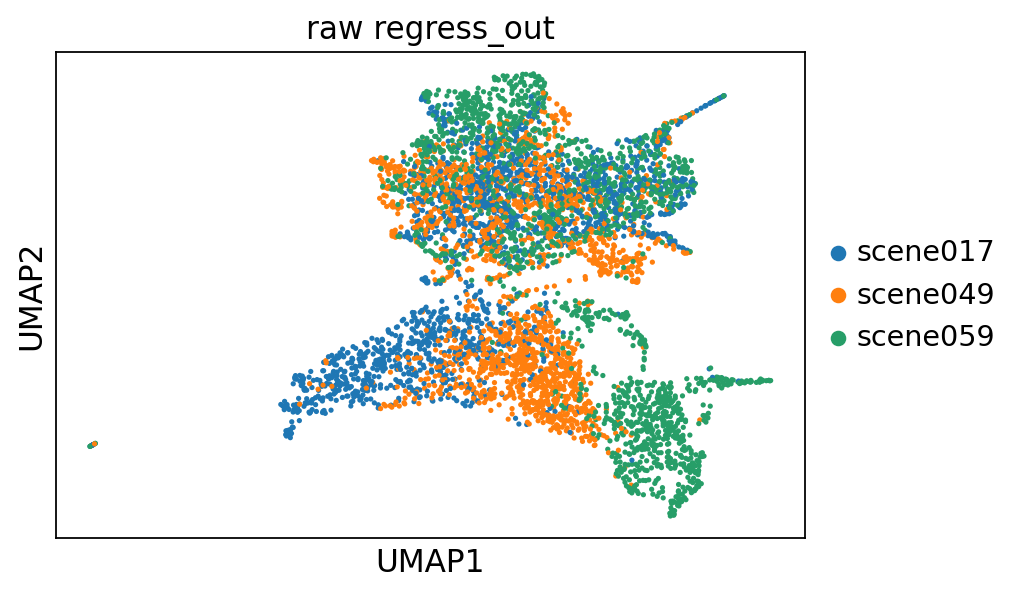

20201209_BM-Her2N75-15-17-18_SampledMeanIntensity_raw.csv
BM-Her2N75-15_scene017_cell04093




... storing 'batch' as categorical
... storing 'scene' as categorical


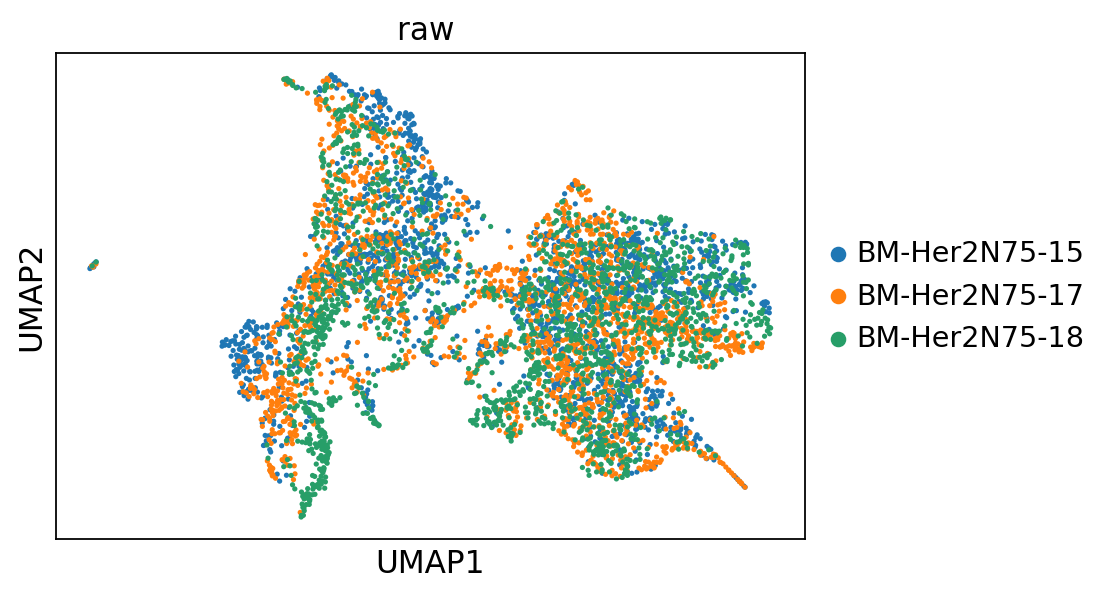

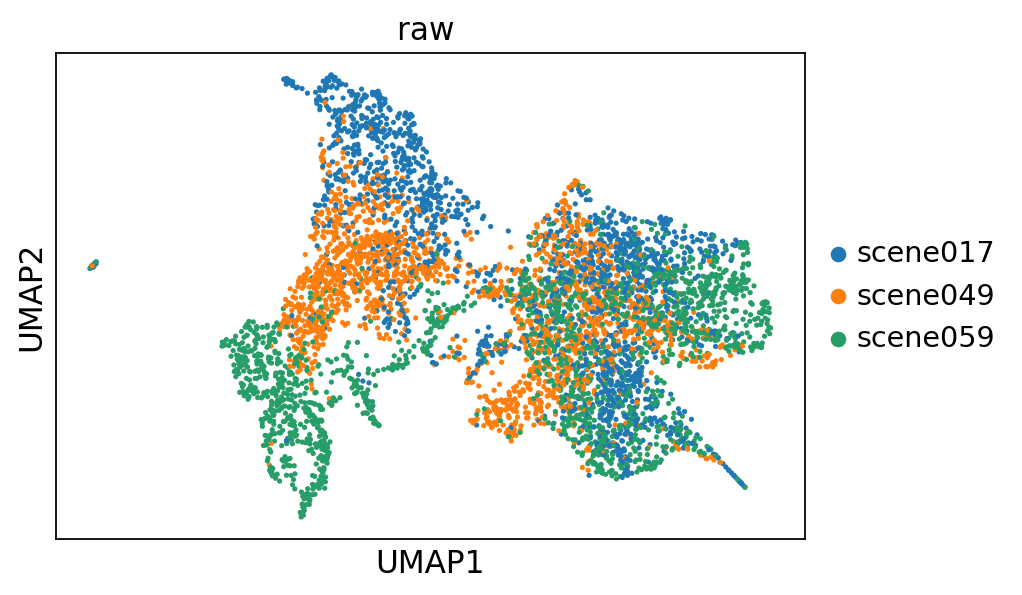

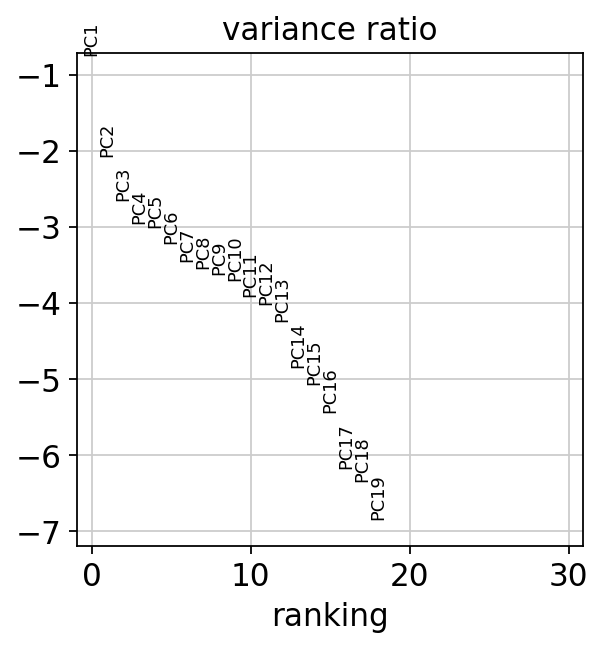

In [20]:
# normalize 
%matplotlib inline
sc.set_figure_params(scanpy=True, fontsize=14)
for s_index in ls_index:
    for s_norm in ['combat','regress_out','']: #,'none'
        print(s_index)
        df = pd.read_csv(s_index.replace('kbet','SampledMeanIntensity'),index_col=0)
        print(df.index[0])
        adata = sc.AnnData(df.loc[:,df.dtypes=='float64'])
        adata.obs['batch'] = [item.split('_scene')[0] for item in adata.obs.index]
        adata.obs['scene'] = [item.split('_')[1] for item in adata.obs.index]
        #log transform, batch correct reduce dimensionality (PCA)
        #if s_type=='Raw':
        #    sc.pp.log1p(adata)
        adata.raw = adata
        #remove batch effect (non work well):#
        print(s_norm)
        if s_norm == 'combat':
            sc.pp.combat(adata,key='batch')
        elif s_norm == 'regress_out':
            sc.pp.regress_out(adata, keys='batch')
        elif s_norm == 'MNN':
            sc.external.pp.mnn_correct(adata,batch_key='batch') #didn't work
        else:
            print('')
        #reduce dimensionality
        sc.tl.pca(adata, svd_solver='auto')
        #sc.pl.pca(adata,color='batch')
        df = pd.DataFrame(data=adata.X,index=adata.obs.index,columns=adata.var.index)
        df['batch'] = [item.split('_scene')[0] for item in df.index]
        df.to_csv(f'{s_index.replace(".csv",f"_{s_norm}.csv")}')
        # calculate neighbors     
        sc.pp.neighbors(adata, n_neighbors=10, n_pcs=23)
        sc.tl.umap(adata)
        #umap plot
        s_type = s_index.split('SampledMeanIntensity_')[1].split('.')[0]
        figname = f"UmapBatch_{s_type}_{s_norm}.png"
        fig,ax = plt.subplots(figsize=(6,4))
        sc.pl.umap(adata, color='batch',title=f"{s_type.replace('_',' ')} {s_norm}",wspace=.25,ax=ax,save=figname)
        fig,ax = plt.subplots(figsize=(6,4))
        figname = f'UmapScene_{s_type}_{s_norm}.png'
        fig = sc.pl.umap(adata, color='scene',save=figname,ax=ax,title=f"{s_type.replace('_',' ')} {s_norm}")
sc.pl.pca_variance_ratio(adata, log=True)